In [54]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
from keras.preprocessing import image
import random
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from sklearn.neural_network import MLPClassifier

In [133]:
p = Path('c:/Users/nishant/pokemon/Train')
dirs = p.glob('*')
image_data = []
for folder in dirs:
    for img_path in folder.glob('*.jpg'):
        img = image.load_img(img_path,target_size=(100,100))
        img_array = image.img_to_array(img)
        image_data.append(img_array)

C:\Users\nishant\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [134]:
df = pd.read_csv('c:/Users/nishant/pokemon/Train/train.csv')

In [135]:
print(len(image_data))

304


In [136]:
df.shape

(304, 2)

In [137]:
df['NameOfPokemon'].value_counts()

Charmander    102
Pikachu       101
Bulbasaur     101
Name: NameOfPokemon, dtype: int64

In [47]:
dic_of_pok = {
      'Charmander' : 0 ,
      'Pikachu' : 1,
       'Bulbasaur': 2 
 } 

In [138]:
df['NameOfPokemon'] = df['NameOfPokemon'].apply(lambda x:dic_of_pok[x])

In [139]:
labels = df['NameOfPokemon'].values


In [140]:
train = np.array(image_data)

In [141]:
combined = list(zip(train,labels))
random.shuffle(combined)
train[:],labels[:] = zip(*combined)

In [142]:
m = train.shape[0]
train = train.reshape((m,-1))

In [143]:
print(train.shape)
print(labels.shape)

(304, 30000)
(304,)


# Train

In [144]:
X_train, X_test, y_train, y_test = train_test_split(train, labels, stratify=labels,random_state=1,test_size=0.1)

In [145]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(273, 30000)
(31, 30000)
(273,)
(31,)


In [146]:
clf = MLPClassifier(hidden_layer_sizes = 1500, max_iter=1500)


In [147]:
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.673992673992674
0.4838709677419355


In [119]:
layer = np.arange(1500,1700,50)

In [120]:
train = []
test = []
for i in layer:
    clf = MLPClassifier(hidden_layer_sizes = i, max_iter=3000)
    clf.fit(X_train,y_train)
    
    train.append(clf.score(X_train,y_train))
    test.append(clf.score(X_test,y_test))

In [87]:
import matplotlib.pyplot as plt

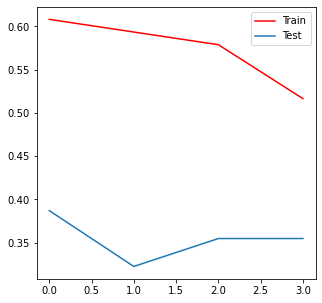

In [121]:
plt.figure(figsize=(5,5))
plt.plot(train,color='red',label='Train')
plt.plot(test,label='Test')
plt.legend()
plt.show()

In [122]:
layer

array([1500, 1550, 1600, 1650])

In [124]:
train = []
test = []
for i in range(1,3002,500):
    clf = MLPClassifier(hidden_layer_sizes = 1500, max_iter=i)
    clf.fit(X_train,y_train)
    
    train.append(clf.score(X_train,y_train))
    test.append(clf.score(X_test,y_test))

C:\Users\nishant\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


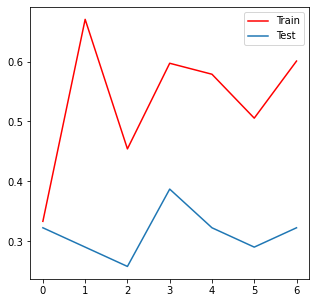

In [125]:
plt.figure(figsize=(5,5))
plt.plot(train,color='red',label='Train')
plt.plot(test,label='Test')
plt.legend()
plt.show()

In [127]:
for i in range(1,3002,500):
    print(i)

1
501
1001
1501
2001
2501
3001


# Test

In [149]:
p = Path('c:/Users/nishant/pokemon/Test')
dirs = p.glob('*')
image_data = []
for folder in dirs:
    for img_path in folder.glob('*.jpg'):
        img = image.load_img(img_path,target_size=(100,100))
        img_array = image.img_to_array(img)
        image_data.append(img_array)

In [150]:
test = np.array(image_data)

In [151]:
test = test.reshape((test.shape[0],-1))

In [152]:
test.shape

(123, 30000)

In [153]:
test_pred = clf.predict(test)

In [155]:
df_test = pd.read_csv('c:/Users/nishant/pokemon/Test/test.csv')

In [157]:
pred_df = pd.DataFrame(test_pred,columns=['NameOfPokemon'])

In [158]:
df_test = pd.concat([df_test,pred_df],axis=1)

In [161]:
convt_dict = {
      0:'Charmander'  ,
      1:'Pikachu',
       2:'Bulbasaur' 
 } 

In [163]:
df_test['NameOfPokemon'] = df_test['NameOfPokemon'].apply(lambda x:convt_dict[x])

In [165]:
df_test.to_csv('submission.csv',index=False)

# CNN

In [21]:
from keras.layers import *
from keras.models import Sequential
import numpy as np
import pandas as pd
import shutil
import os
import random
from keras.preprocessing import image
import keras
from keras.applications import MobileNetV2
from keras.models import Model

In [2]:
classes = ['Charmander','Pikachu','Bulbasaur']

In [4]:
for c in classes:
    path = 'c:/Users/nishant/pokemon/Train/train/'+c
    path_test = 'c:/Users/nishant/pokemon/Train/validation/' + c
    os.mkdir(path)
    os.mkdir(path_test)

In [5]:
df = pd.read_csv('C:/Users/nishant/pokemon/Train/train.csv')

In [6]:
df.head()

,ImageId,NameOfPokemon
0,296.jpg,Pikachu
1,297.jpg,Pikachu
2,298.jpg,Pikachu
3,299.jpg,Pikachu
4,300.jpg,Pikachu


In [7]:
for i in range(len(df)):
    
    src = 'c:/Users/nishant/pokemon/Train/Images/'+df.iloc[i,0]
    dest = 'c:/Users/nishant/pokemon/Train/train/'+df.iloc[i,1] +'/'+ df.iloc[i,0] 
    shutil.move(src,dest)
    print(src)
    print(dest)
    

c:/Users/nishant/pokemon/Train/Images/296.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/296.jpg
c:/Users/nishant/pokemon/Train/Images/297.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/297.jpg
c:/Users/nishant/pokemon/Train/Images/298.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/298.jpg
c:/Users/nishant/pokemon/Train/Images/299.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/299.jpg
c:/Users/nishant/pokemon/Train/Images/300.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/300.jpg
c:/Users/nishant/pokemon/Train/Images/301.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/301.jpg
c:/Users/nishant/pokemon/Train/Images/302.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/302.jpg
c:/Users/nishant/pokemon/Train/Images/303.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/303.jpg
c:/Users/nishant/pokemon/Train/Images/304.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/304.jpg
c:/Users/nishant/pokemon/Train/Images/305.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/305.jpg
c:/Users/n

c:/Users/nishant/pokemon/Train/Images/380.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/380.jpg
c:/Users/nishant/pokemon/Train/Images/381.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/381.jpg
c:/Users/nishant/pokemon/Train/Images/382.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/382.jpg
c:/Users/nishant/pokemon/Train/Images/383.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/383.jpg
c:/Users/nishant/pokemon/Train/Images/384.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/384.jpg
c:/Users/nishant/pokemon/Train/Images/385.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/385.jpg
c:/Users/nishant/pokemon/Train/Images/386.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/386.jpg
c:/Users/nishant/pokemon/Train/Images/387.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/387.jpg
c:/Users/nishant/pokemon/Train/Images/388.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/388.jpg
c:/Users/nishant/pokemon/Train/Images/389.jpg
c:/Users/nishant/pokemon/Train/train/Pikachu/389.jpg
c:/Users/n

c:/Users/nishant/pokemon/Train/Images/488.jpg
c:/Users/nishant/pokemon/Train/train/Bulbasaur/488.jpg
c:/Users/nishant/pokemon/Train/Images/489.jpg
c:/Users/nishant/pokemon/Train/train/Bulbasaur/489.jpg
c:/Users/nishant/pokemon/Train/Images/490.jpg
c:/Users/nishant/pokemon/Train/train/Bulbasaur/490.jpg
c:/Users/nishant/pokemon/Train/Images/491.jpg
c:/Users/nishant/pokemon/Train/train/Bulbasaur/491.jpg
c:/Users/nishant/pokemon/Train/Images/492.jpg
c:/Users/nishant/pokemon/Train/train/Bulbasaur/492.jpg
c:/Users/nishant/pokemon/Train/Images/493.jpg
c:/Users/nishant/pokemon/Train/train/Bulbasaur/493.jpg
c:/Users/nishant/pokemon/Train/Images/494.jpg
c:/Users/nishant/pokemon/Train/train/Bulbasaur/494.jpg
c:/Users/nishant/pokemon/Train/Images/495.jpg
c:/Users/nishant/pokemon/Train/train/Bulbasaur/495.jpg
c:/Users/nishant/pokemon/Train/Images/496.jpg
c:/Users/nishant/pokemon/Train/train/Bulbasaur/496.jpg
c:/Users/nishant/pokemon/Train/Images/497.jpg
c:/Users/nishant/pokemon/Train/train/Bulbasau

c:/Users/nishant/pokemon/Train/Images/620.jpg
c:/Users/nishant/pokemon/Train/train/Charmander/620.jpg


In [15]:
split = 0.9
for c in classes:
    path = 'c:/Users/nishant/pokemon/Train/train/'+c
    file = os.listdir(path)
    print(len(file))
    file_to_move = file[int(split*len(file)):]
    print(len(file_to_move))
    for img_f  in file_to_move:
        dest = os.path.join('c:/Users/nishant/pokemon/Train/validation/'+c,img_f)
        src = os.path.join(path,img_f)
        shutil.move(src,dest)
        print(src)
        print(dest)
        
    
    

102
11
c:/Users/nishant/pokemon/Train/train/Charmander\610.jpg
c:/Users/nishant/pokemon/Train/validation/Charmander\610.jpg
c:/Users/nishant/pokemon/Train/train/Charmander\611.jpg
c:/Users/nishant/pokemon/Train/validation/Charmander\611.jpg
c:/Users/nishant/pokemon/Train/train/Charmander\612.jpg
c:/Users/nishant/pokemon/Train/validation/Charmander\612.jpg
c:/Users/nishant/pokemon/Train/train/Charmander\613.jpg
c:/Users/nishant/pokemon/Train/validation/Charmander\613.jpg
c:/Users/nishant/pokemon/Train/train/Charmander\614.jpg
c:/Users/nishant/pokemon/Train/validation/Charmander\614.jpg
c:/Users/nishant/pokemon/Train/train/Charmander\615.jpg
c:/Users/nishant/pokemon/Train/validation/Charmander\615.jpg
c:/Users/nishant/pokemon/Train/train/Charmander\616.jpg
c:/Users/nishant/pokemon/Train/validation/Charmander\616.jpg
c:/Users/nishant/pokemon/Train/train/Charmander\617.jpg
c:/Users/nishant/pokemon/Train/validation/Charmander\617.jpg
c:/Users/nishant/pokemon/Train/train/Charmander\618.jpg
c

In [16]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [17]:
val_datagen = image.ImageDataGenerator(
           rescale = 1./255
)

In [39]:
train_generator = train_datagen.flow_from_directory(
        'c:/Users/nishant/pokemon/Train/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode ='categorical',
        shuffle=True
)

Found 271 images belonging to 3 classes.


In [19]:
train_generator.class_indices

{'Bulbasaur': 0, 'Charmander': 1, 'Pikachu': 2}

In [38]:
validation_generator = val_datagen.flow_from_directory(
        'c:/Users/nishant/pokemon/Train/validation',
        target_size=(224,224),
        batch_size=10,
        class_mode ='categorical',
        shuffle=True
        )

Found 33 images belonging to 3 classes.


In [31]:
model = MobileNetV2(include_top=False,weights="imagenet",input_shape=(224,224,3))  

In [32]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(3,activation='softmax')(d1)

model_new = Model(inputs=model.input,outputs=fc2)

In [33]:
for i in range(150):
    model_new.layers[i].trainable=False 

In [34]:
model_new.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [41]:
model_new.fit_generator(train_generator,steps_per_epoch=10,epochs=3,validation_data=validation_generator)

Epoch 1/3
10/10 [==============================] - 17s 2s/step - loss: 0.0864 - accuracy: 0.9779 - val_loss: 0.0037 - val_accuracy: 1.0000


In [42]:
test_datagen = image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'c:/Users/nishant/pokemon/Test',
        classes=['Images'],
         target_size=(224, 224),
        class_mode=None,  # only data, no labels
        shuffle=False
        )  

Found 123 images belonging to 1 classes.


In [43]:

pred = model_new.predict_generator(test_generator)

C:\Users\nishant\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [46]:
pred = pred.argmax(axis=1)

In [47]:
y_test_name = test_generator.filenames 

In [49]:
filenames_to_cls = dict(zip(test_generator.filenames, pred))

In [50]:
df_test = pd.read_csv('c:/Users/nishant/pokemon/Test/test.csv')

In [53]:
df_test['NameOfPokemon'] = df_test['ImageId'].apply(lambda x : filenames_to_cls['Images\\'+x])

In [55]:
dict_to_change = {0:'Bulbasaur', 1:'Charmander', 2:'Pikachu'}

In [56]:
df_test['NameOfPokemon'] = df_test['NameOfPokemon'].apply(lambda x : dict_to_change[x])

In [58]:
df_test.to_csv('submission.csv',index=False)